In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'dark')

import plotly as py
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
from wordcloud import WordCloud

from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize, StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier, XGBRFClassifier, plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, auc
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [3]:
df.shape

(215, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


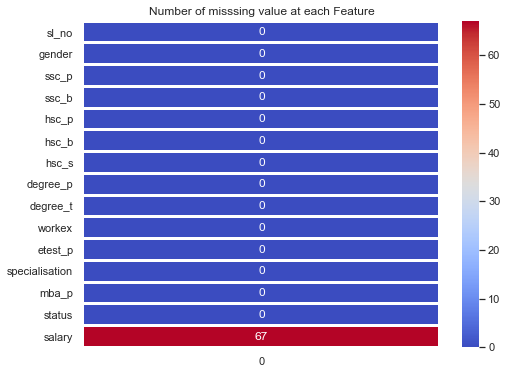

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isna().sum().to_frame(), cmap = 'coolwarm', linewidth = 2, annot = True)
plt.title('Number of misssing value at each Feature')
plt.show();

In [6]:
df[df['salary'].isnull()]

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
3        4      M   56.0  Central   52.0  Central   Science     52.00   
5        6      M   55.0   Others   49.8   Others   Science     67.25   
6        7      F   46.0   Others   49.2   Others  Commerce     79.00   
9       10      M   58.0  Central   70.0  Central  Commerce     61.00   
12      13      F   47.0  Central   55.0   Others   Science     65.00   
..     ...    ...    ...      ...    ...      ...       ...       ...   
198    199      F   67.0  Central   70.0  Central  Commerce     65.00   
201    202      M   54.2  Central   63.0   Others   Science     58.00   
206    207      M   41.0  Central   42.0  Central   Science     60.00   
208    209      F   43.0  Central   60.0   Others   Science     65.00   
214    215      M   62.0  Central   58.0   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status  salary  
3     Sci&Tech     No    66.00         Mkt&HR  59.43  Not Placed     NaN  
5     Sci&Tech    Yes    55.00        Mkt&Fin  51.58  Not Placed     NaN  
6    Comm&Mgmt     No    74.28        Mkt&Fin  53.29  Not Placed     NaN  
9    Comm&Mgmt     No    54.00        Mkt&Fin  52.21  Not Placed     NaN  
12   Comm&Mgmt     No    62.00         Mkt&HR  65.04  Not Placed     NaN  
..         ...    ...      ...            ...    ...         ...     ...  
198     Others     No    88.00         Mkt&HR  71.96  Not Placed     NaN  
201  Comm&Mgmt     No    79.00         Mkt&HR  58.44  Not Placed     NaN  
206  Comm&Mgmt     No    97.00        Mkt&Fin  53.39  Not Placed     NaN  
208  Comm&Mgmt     No    92.66         Mkt&HR  62.92  Not Placed     NaN  
214  Comm&Mgmt     No    89.00         Mkt&HR  60.22  Not Placed     NaN  

[67 rows x 15 columns]

In [7]:
df['salary'] = df['salary'].fillna(0)

In [8]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
df.drop('sl_no', axis=1, inplace = True)

In [10]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print('{}:\n{}'.format(variable, varValue))

In [11]:
cat = (df.dtypes == 'object')
cat_list = list(cat[cat].index)

print('Categorical variables')
print(cat_list)

Categorical variables
['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [12]:
# sns.set_style('darkgrid')
# for c in cat_list:
#     bar_plot(c)

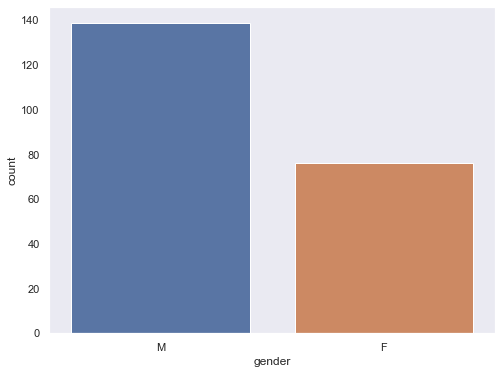

M    139
F     76
Name: gender, dtype: int64


In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', data=df)
plt.show()
print(df['gender'].value_counts())

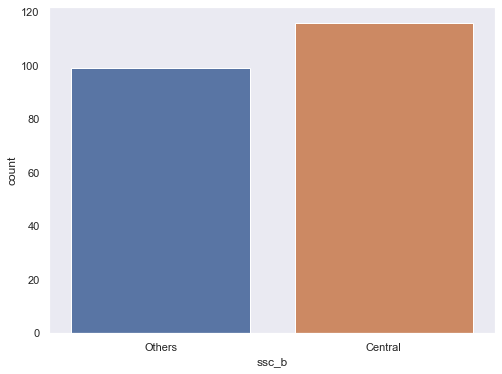

Central    116
Others      99
Name: ssc_b, dtype: int64


In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='ssc_b', data=df)
plt.show()
print(df['ssc_b'].value_counts())

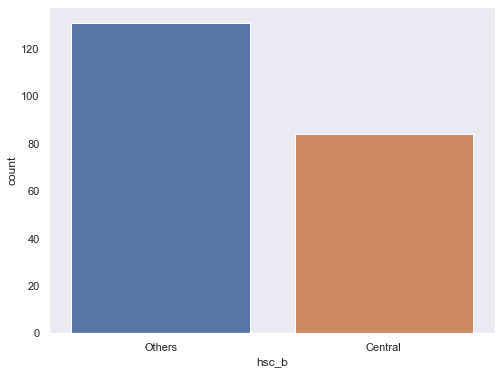

Others     131
Central     84
Name: hsc_b, dtype: int64


In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='hsc_b', data=df)
plt.show()
print(df['hsc_b'].value_counts())

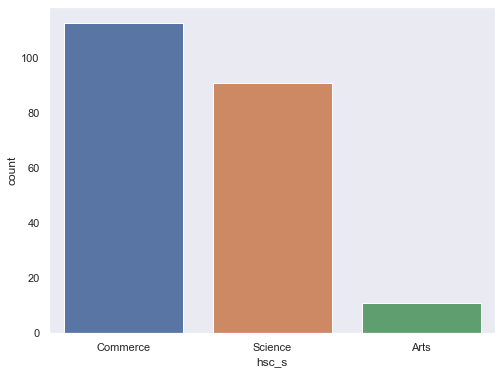

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64


In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x='hsc_s', data=df)
plt.show()
print(df['hsc_s'].value_counts())

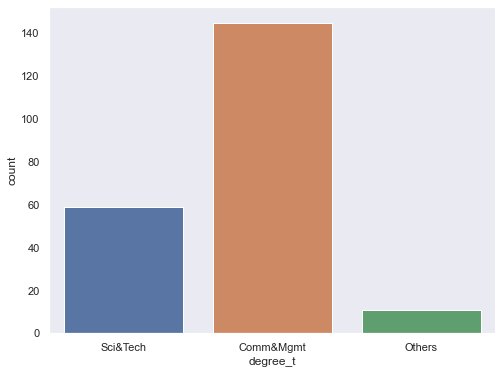

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64


In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='degree_t', data=df)
plt.show()
print(df['degree_t'].value_counts())

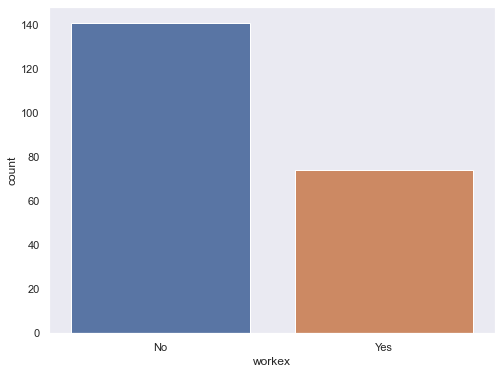

No     141
Yes     74
Name: workex, dtype: int64


In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='workex', data=df)
plt.show()
print(df['workex'].value_counts())

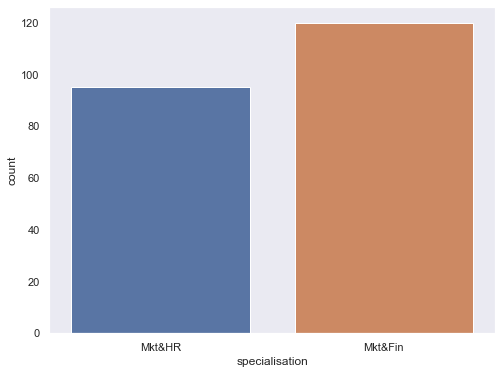

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64


In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='specialisation', data=df)
plt.show()
print(df['specialisation'].value_counts())

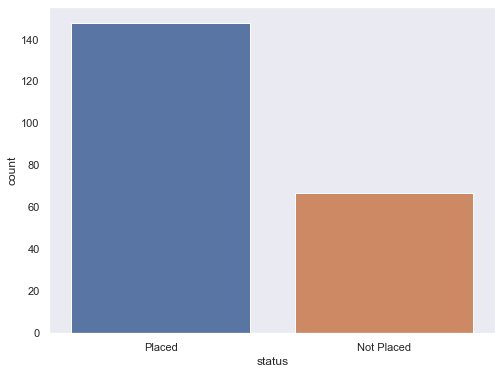

Placed        148
Not Placed     67
Name: status, dtype: int64


In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='status', data=df)
plt.show()
print(df['status'].value_counts())

In [21]:
num_float =  (df.dtypes == 'float64')
num_float_list = list(num_float[num_float].index)

print('Numerical variables')
print(num_float_list)

Numerical variables
['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [22]:
def hist_plot(variable):
    plt.figure(figsize=(12,8))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('{} Distribution with Histogram'.format(variable))
    plt.show()

In [23]:
# for n in num_float_list:
#     hist_plot(n)

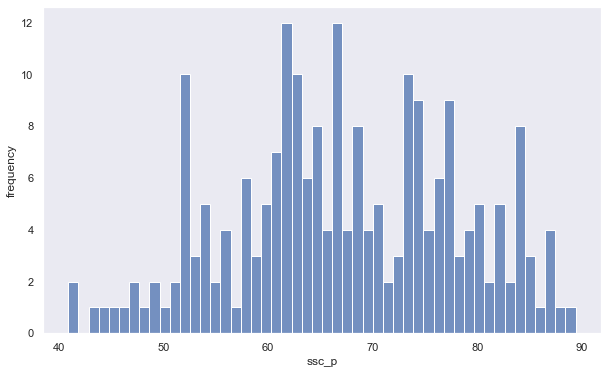

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'ssc_p', data = df, bins = 50)
plt.ylabel('frequency')
plt.show();

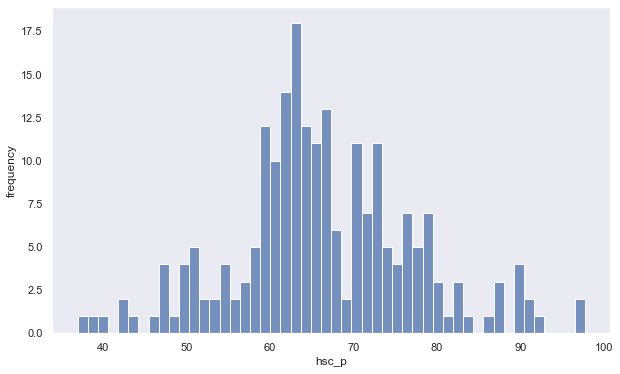

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'hsc_p', data = df, bins = 50)
plt.ylabel('frequency')
plt.show();

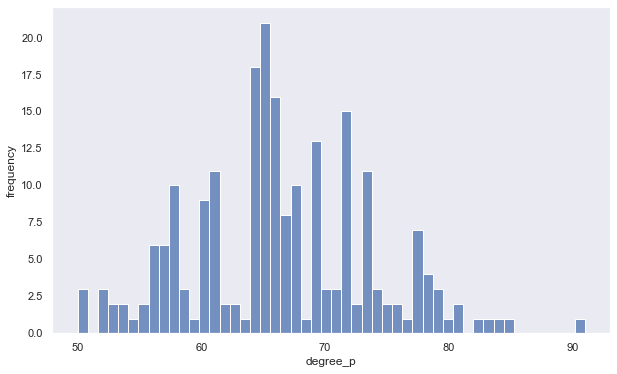

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'degree_p', data = df, bins = 50)
plt.ylabel('frequency')
plt.show();

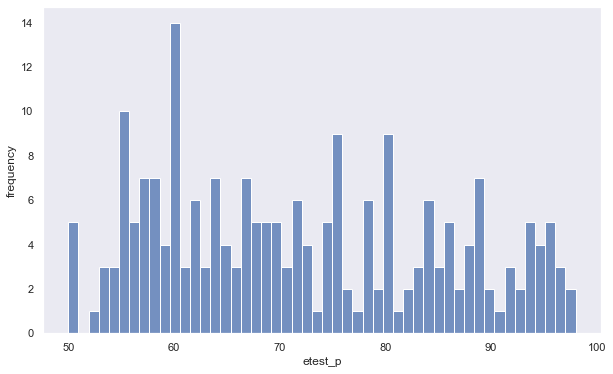

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'etest_p', data = df, bins = 50)
plt.ylabel('frequency')
plt.show();

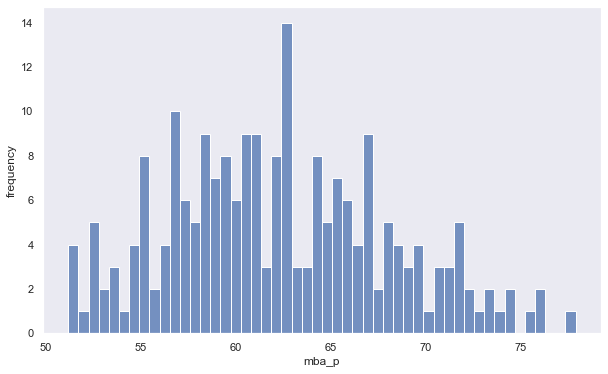

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'mba_p', data = df, bins = 50)
plt.ylabel('frequency')
plt.show();

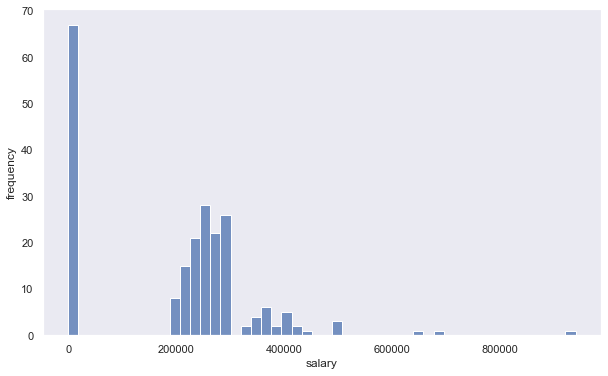

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'salary', data = df, bins = 50)
plt.ylabel('frequency')
plt.show();

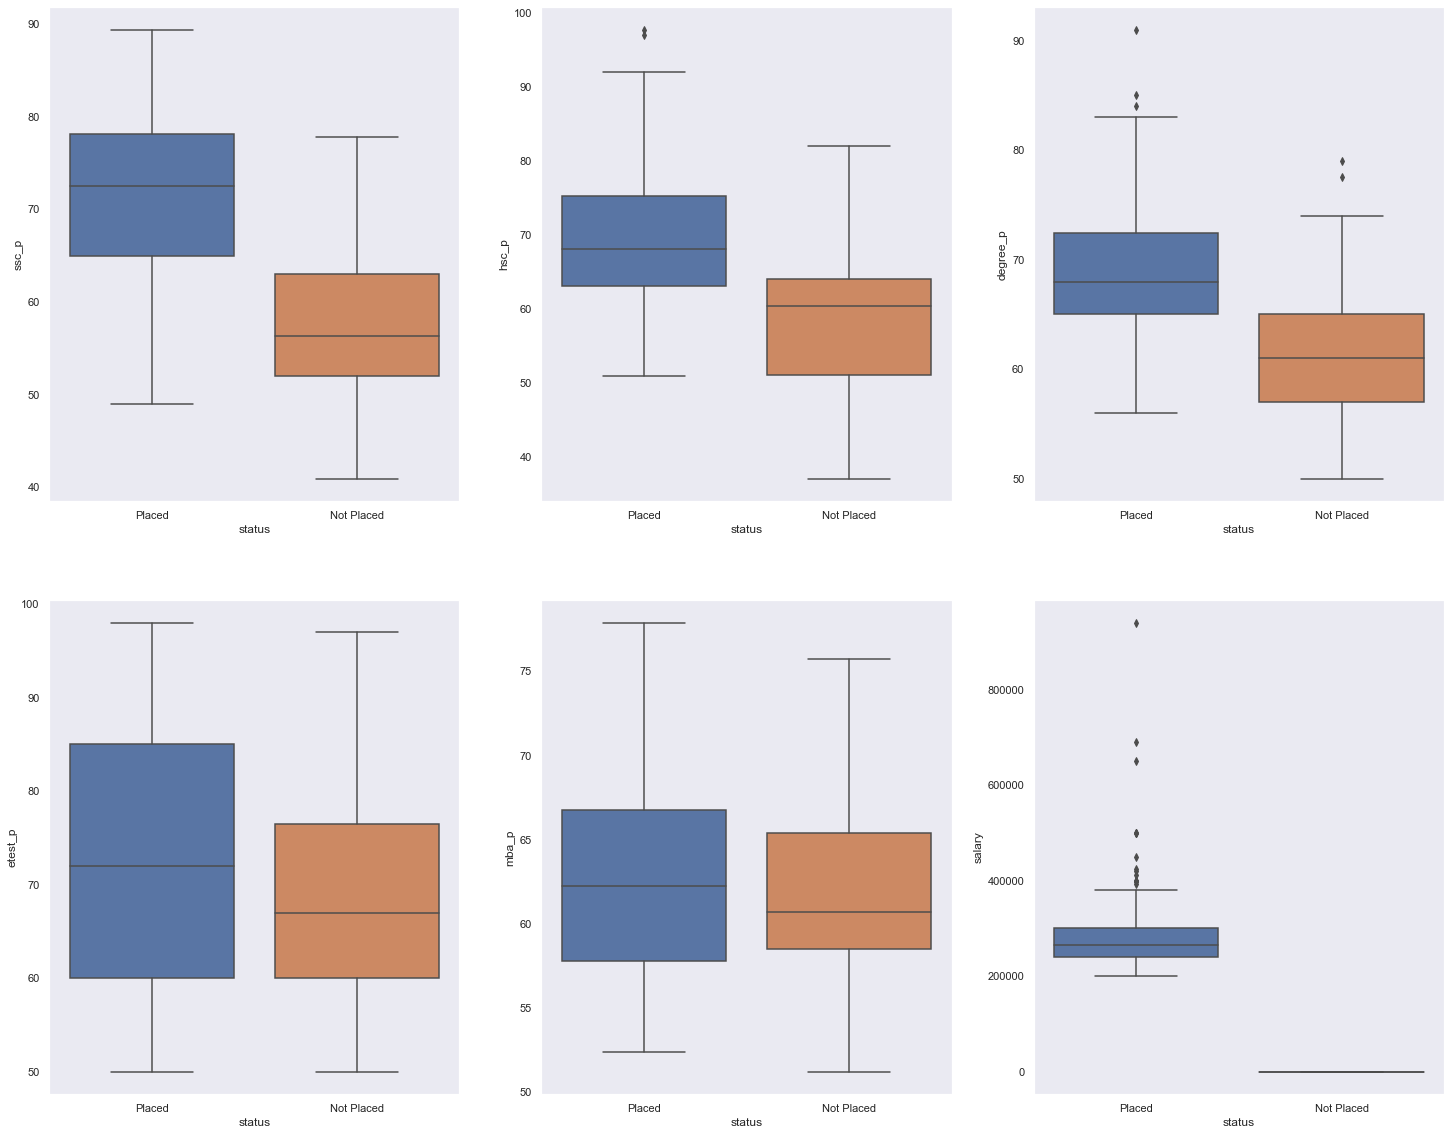

In [30]:
plt.figure(figsize=(25,20))
plt.subplot(2,3,1)

plt.subplot(2,3,1)
sns.boxplot(x='status', y='ssc_p', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='status', y='hsc_p', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='status', y='degree_p', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='status', y='etest_p', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='status', y='mba_p', data=df)

plt.subplot(2,3,6)
sns.boxplot(x='status', y='salary',data=df)

plt.show();

In [31]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [32]:
status_mapping = {'Not Placed': 0, 'Placed': 1}
df['status'] = df['status'].map(status_mapping)

In [33]:
df[['gender', 'status']].groupby(['gender'], as_index = False).count().sort_values(by='status', 
                                                                                   ascending=False)

gender  status
1      M     139
0      F      76

In [34]:
df = df

labels = df['gender'].value_counts().index
pie1 = df['gender'].value_counts().values
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name+value",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Distribution of Genders",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Genders",
                "x": 1,
                "y": 1,
            },
        ]
    }
}
iplot(fig)

In [35]:
df[['ssc_b', 'status']].groupby(['ssc_b'], as_index = False).count().sort_values(by='status', 
                                                                                ascending = False)

ssc_b  status
0  Central     116
1   Others      99

Text(0.5, 1.0, 'Distribution of Samples by sss_b')

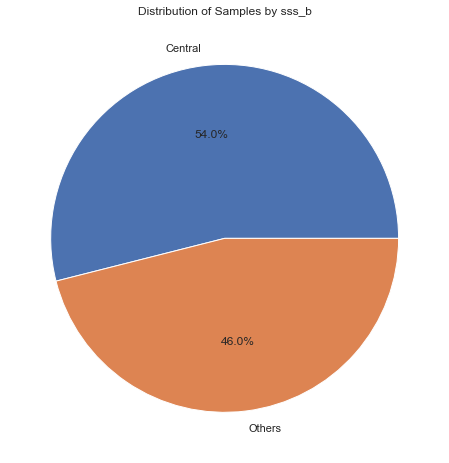

In [36]:
labels = df['ssc_b'].value_counts().index
size = df['ssc_b'].value_counts().values

plt.figure(figsize=(8,8))
plt.pie(size, labels=labels, autopct = '%1.1f%%')
plt.title('Distribution of Samples by sss_b')

In [37]:
df[['hsc_b', 'status']].groupby(['hsc_b'], as_index = False).count().sort_values(by='status',
                                                                                ascending = False)

hsc_b  status
1   Others     131
0  Central      84

Text(0.5, 1.0, 'Distribution of Samples by hsc_b')

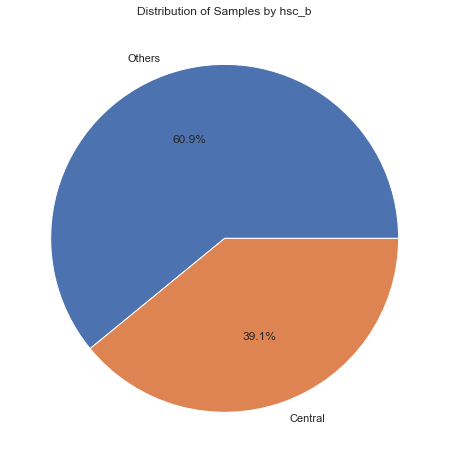

In [38]:
labels = df['hsc_b'].value_counts().index
size = df['hsc_b'].value_counts().values

plt.figure(figsize=(8,8))
plt.pie(size, labels=labels, autopct = '%1.1f%%')
plt.title('Distribution of Samples by hsc_b')

In [39]:
df[['degree_t', 'status']].groupby(['degree_t'], as_index=False).count().sort_values(by='status',ascending=False)

degree_t  status
0  Comm&Mgmt     145
2   Sci&Tech      59
1     Others      11

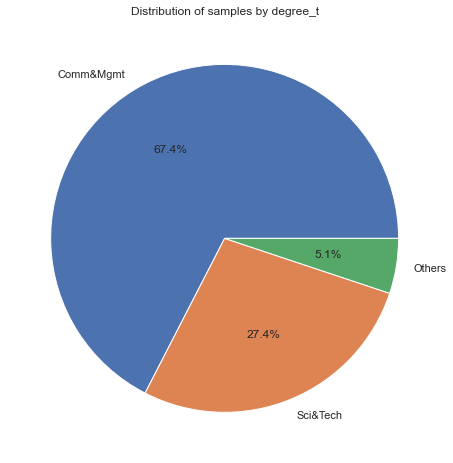

In [40]:
labels = df['degree_t'].value_counts().index
size = df['degree_t'].value_counts().values

plt.figure(figsize=(8,8))
plt.pie(size, labels = labels, autopct = '%1.1f%%')
plt.title('Distribution of samples by degree_t')
plt.show();

In [41]:
df[['workex','status']].groupby(['workex'],as_index = False).count().sort_values(by = 'status',
                                                                              ascending = False)

workex  status
0     No     141
1    Yes      74

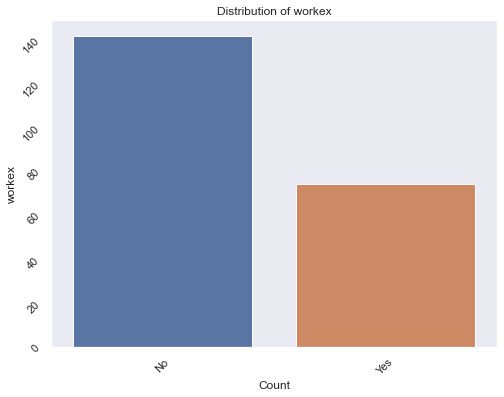

In [42]:
counts = df['workex'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x = counts.index, y = counts.values)
plt.xlabel('Count')
plt.ylabel('workex')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Distribution of workex')
plt.show();

In [43]:
df[['specialisation', 'status']].groupby(['specialisation'],as_index = False).count().sort_values(by = 'status',
                                                                                                ascending = False)

specialisation  status
0        Mkt&Fin     120
1         Mkt&HR      95

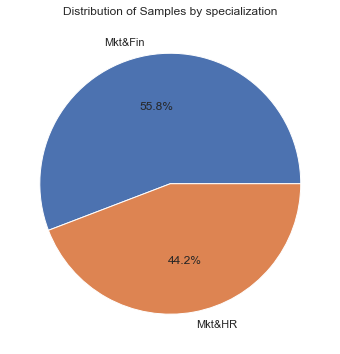

In [44]:
labels = df['specialisation'].value_counts().index
sizes = df['specialisation'].value_counts().values

plt.figure(figsize=(8,6))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%')
plt.title('Distribution of Samples by specialization')
plt.show();

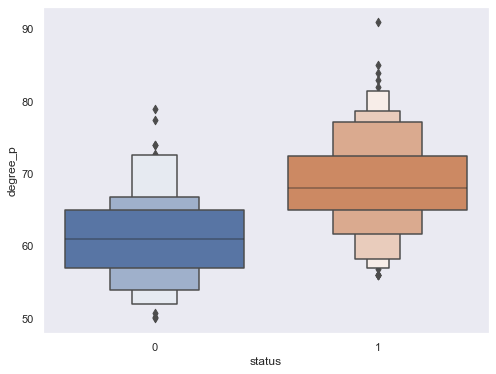

In [45]:
plt.figure(figsize=(8,6))
sns.boxenplot(x=df['status'], y=df['degree_p'], data=df)
plt.show()

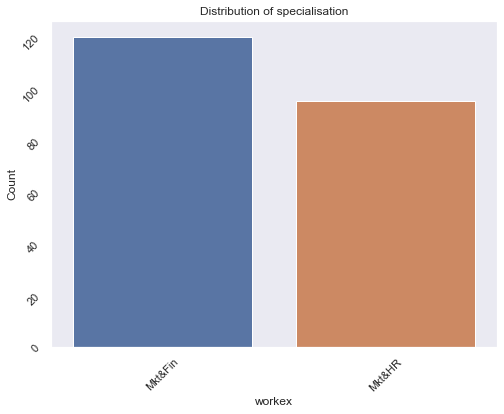

In [46]:
counts = df['specialisation'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y = counts.values, data=df)

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

plt.xlabel('workex')
plt.ylabel('Count')

plt.title('Distribution of specialisation')
plt.show();

# Developing all dataset report using Pandas 

In [47]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
df.corr()

ssc_p     hsc_p  degree_p   etest_p     mba_p    status    salary
ssc_p     1.000000  0.511472  0.538404  0.261993  0.388478  0.607889  0.538090
hsc_p     0.511472  1.000000  0.434206  0.245113  0.354823  0.491228  0.452569
degree_p  0.538404  0.434206  1.000000  0.224470  0.402364  0.479861  0.408371
etest_p   0.261993  0.245113  0.224470  1.000000  0.218055  0.127639  0.186988
mba_p     0.388478  0.354823  0.402364  0.218055  1.000000  0.076922  0.139823
status    0.607889  0.491228  0.479861  0.127639  0.076922  1.000000  0.865774
salary    0.538090  0.452569  0.408371  0.186988  0.139823  0.865774  1.000000

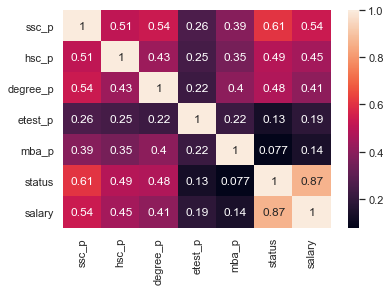

In [49]:
sns.heatmap(df.corr(), annot = True)
plt.show();

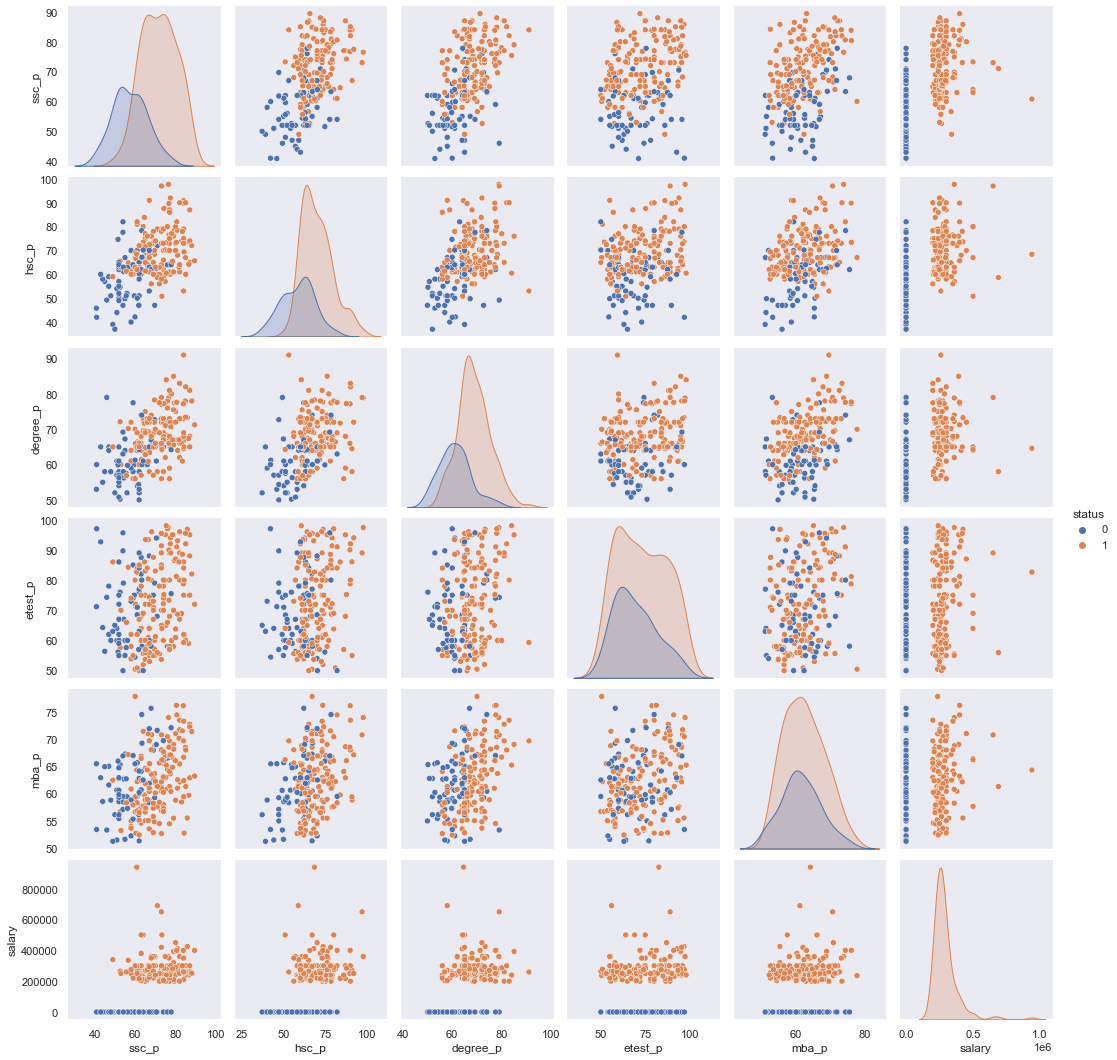

In [50]:
sns.pairplot(df, hue='status')

# Encoding 

In [51]:
cat_var = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
for i in range(0, len(cat_var)):
    print(f'Unique values for {cat_var[i]}', df[f'{cat_var[i]}'].unique())

Unique values for gender ['M' 'F']
Unique values for ssc_b ['Others' 'Central']
Unique values for hsc_b ['Others' 'Central']
Unique values for hsc_s ['Commerce' 'Science' 'Arts']
Unique values for degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique values for workex ['No' 'Yes']
Unique values for specialisation ['Mkt&HR' 'Mkt&Fin']


# Label Encoding 

In [52]:
gender_mapping = {'M': 0, 'F': 1}
df['gender'] = df['gender'].map(gender_mapping)

ssc_b_mapping = {'Others': 0, 'Central': 1}
df['ssc_b'] = df['ssc_b'].map(ssc_b_mapping)

hsc_b_mapping = {'Others': 0, 'Central': 1}
df['hsc_b'] = df['hsc_b'].map(hsc_b_mapping)

workex_mapping = {'No': 0, 'Yes': 1}
df['workex'] = df['workex'].map(workex_mapping)

specialisation_mapping = {'Mkt&HR': 0, 'Mkt&Fin': 1}
df['specialisation'] = df['specialisation'].map(specialisation_mapping)

In [53]:
df.head()

gender  ssc_p  ssc_b  hsc_p  hsc_b     hsc_s  degree_p   degree_t  workex  \
0       0  67.00      0  91.00      0  Commerce     58.00   Sci&Tech       0   
1       0  79.33      1  78.33      0   Science     77.48   Sci&Tech       1   
2       0  65.00      1  68.00      1      Arts     64.00  Comm&Mgmt       0   
3       0  56.00      1  52.00      1   Science     52.00   Sci&Tech       0   
4       0  85.80      1  73.60      1  Commerce     73.30  Comm&Mgmt       0   

   etest_p  specialisation  mba_p  status    salary  
0     55.0               0  58.80       1  270000.0  
1     86.5               1  66.28       1  200000.0  
2     75.0               1  57.80       1  250000.0  
3     66.0               0  59.43       0       0.0  
4     96.8               1  55.50       1  425000.0

# One hot Encoding

In [54]:
onehotencoder = OneHotEncoder()

one_hot = ['hsc_s', 'degree_t']

for i in range(0,len(one_hot)):
    df[f'{one_hot[i]}'] = pd.Categorical(df[f'{one_hot[i]}'])
    dummies = pd.get_dummies(df[f'{one_hot[i]}'], prefix = f'{one_hot[i]}_encoded')
    df.drop([f'{one_hot[i]}'], axis=1, inplace=True)
    df = pd.concat([df, dummies], axis=1)
df.head()

gender  ssc_p  ssc_b  hsc_p  hsc_b  degree_p  workex  etest_p  \
0       0  67.00      0  91.00      0     58.00       0     55.0   
1       0  79.33      1  78.33      0     77.48       1     86.5   
2       0  65.00      1  68.00      1     64.00       0     75.0   
3       0  56.00      1  52.00      1     52.00       0     66.0   
4       0  85.80      1  73.60      1     73.30       0     96.8   

   specialisation  mba_p  status    salary  hsc_s_encoded_Arts  \
0               0  58.80       1  270000.0                   0   
1               1  66.28       1  200000.0                   0   
2               1  57.80       1  250000.0                   1   
3               0  59.43       0       0.0                   0   
4               1  55.50       1  425000.0                   0   

   hsc_s_encoded_Commerce  hsc_s_encoded_Science  degree_t_encoded_Comm&Mgmt  \
0                       1                      0                           0   
1                       0                      1                           0   
2                       0                      0                           1   
3                       0                      1                           0   
4                       1                      0                           1   

   degree_t_encoded_Others  degree_t_encoded_Sci&Tech  
0                        0                          1  
1                        0                          1  
2                        0                          0  
3                        0                          1  
4                        0                          0

# Train Test Split 

In [67]:
X = df.drop('status', axis = 1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state = 101)
X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, test_size = 0.5, random_state = 42)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(y_train)}')
print(f'Total # of sample in test dataset: {len(y_test)}')

Total # of sample in whole dataset: 215
Total # of sample in train dataset: 144
Total # of sample in validation dataset: 144
Total # of sample in test dataset: 36


In [68]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# GaussianNB 

In [69]:
gu = GaussianNB()
gu.fit(X_train, y_train)
y_preds = gu.predict(X_test)
y_probs = gu.predict_proba(X_test)[:,1]

print(precision_score(y_test, y_preds))
print(recall_score(y_test, y_preds))
print(f1_score(y_test, y_preds))
print(roc_auc_score(y_test, y_preds))

0.5555555555555556
1.0
0.7142857142857143
0.5


In [70]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.56      1.00      0.71        20

    accuracy                           0.56        36
   macro avg       0.28      0.50      0.36        36
weighted avg       0.31      0.56      0.40        36



In [71]:
print(f'ROC AUC Score {roc_auc_score(y_test, y_probs)}')

ROC AUC Score 0.5


In [72]:
def cross_val():
    print('Cross validation socre with 5 folds')
    print(f"ROC AUC: {round(cross_val_score(gu, X, y, cv=5, scoring='roc_auc').mean(),2)}")
    print(f'Precision score: {round(cross_val_score(gu, X, y, cv=5, scoring = "precision").mean(),2)}')
    print(f'F1 score: {round(cross_val_score(gu, X, y, cv = 5, scoring = "f1").mean(),2)}')
    print(f'Recall score: {round(cross_val_score(gu, X,y, cv = 5, scoring = "recall").mean(),2)}')
cross_val()

Cross validation socre with 5 folds
ROC AUC: 1.0
Precision score: 1.0
F1 score: 1.0
Recall score: 1.0


<AxesSubplot:>

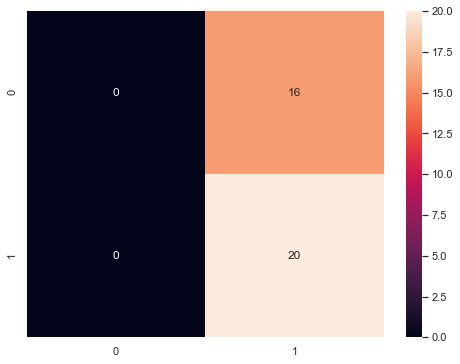

In [73]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot = True, fmt = 'd')

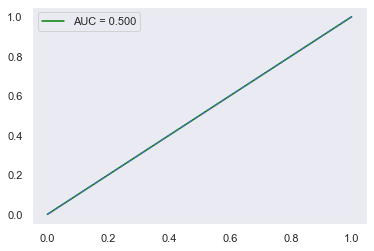

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'green', label = 'AUC = %0.3f'%roc_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()
plt.axis('tight')
plt.show()

# Logistic Regression 

In [75]:
lg = RandomForestClassifier()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
y_probs = lg.predict_proba(X_test)[:,1]

print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

1.0
1.0
1.0
1.0


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        20

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [77]:
print(f"ROC AUC Score {roc_auc_score(y_test, y_probs)}")

ROC AUC Score 1.0


<AxesSubplot:>

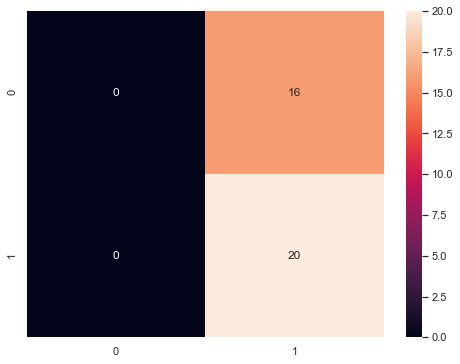

In [78]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot = True, fmt = 'd')

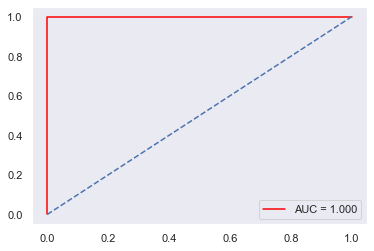

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'red', label = 'AUC = %0.3f'%roc_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()
plt.axis('tight')
plt.show()